In [1]:
import os, sys
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv('2015.csv')

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df.head(n=30)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [11]:
visualise = df[['Country', 'Region', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]

In [12]:
grouped_region = visualise.groupby('Region')
grouped_region.mean()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Region,,,,,,
Australia and New Zealand,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315
Central and Eastern Europe,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264
Eastern Asia,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885
Latin America and Caribbean,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788
Middle East and Northern Africa,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375
North America,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580
Southeastern Asia,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261
Southern Asia,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429
Sub-Saharan Africa,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137


Region
Australia and New Zealand          Axes(0.125,0.125;0.775x0.755)
Central and Eastern Europe         Axes(0.125,0.125;0.775x0.755)
Eastern Asia                       Axes(0.125,0.125;0.775x0.755)
Latin America and Caribbean        Axes(0.125,0.125;0.775x0.755)
Middle East and Northern Africa    Axes(0.125,0.125;0.775x0.755)
North America                      Axes(0.125,0.125;0.775x0.755)
Southeastern Asia                  Axes(0.125,0.125;0.775x0.755)
Southern Asia                      Axes(0.125,0.125;0.775x0.755)
Sub-Saharan Africa                 Axes(0.125,0.125;0.775x0.755)
Western Europe                     Axes(0.125,0.125;0.775x0.755)
Name: Family, dtype: object

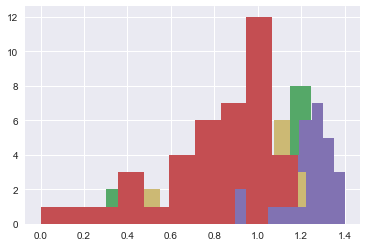

In [14]:
grouped_region['Family'].hist()

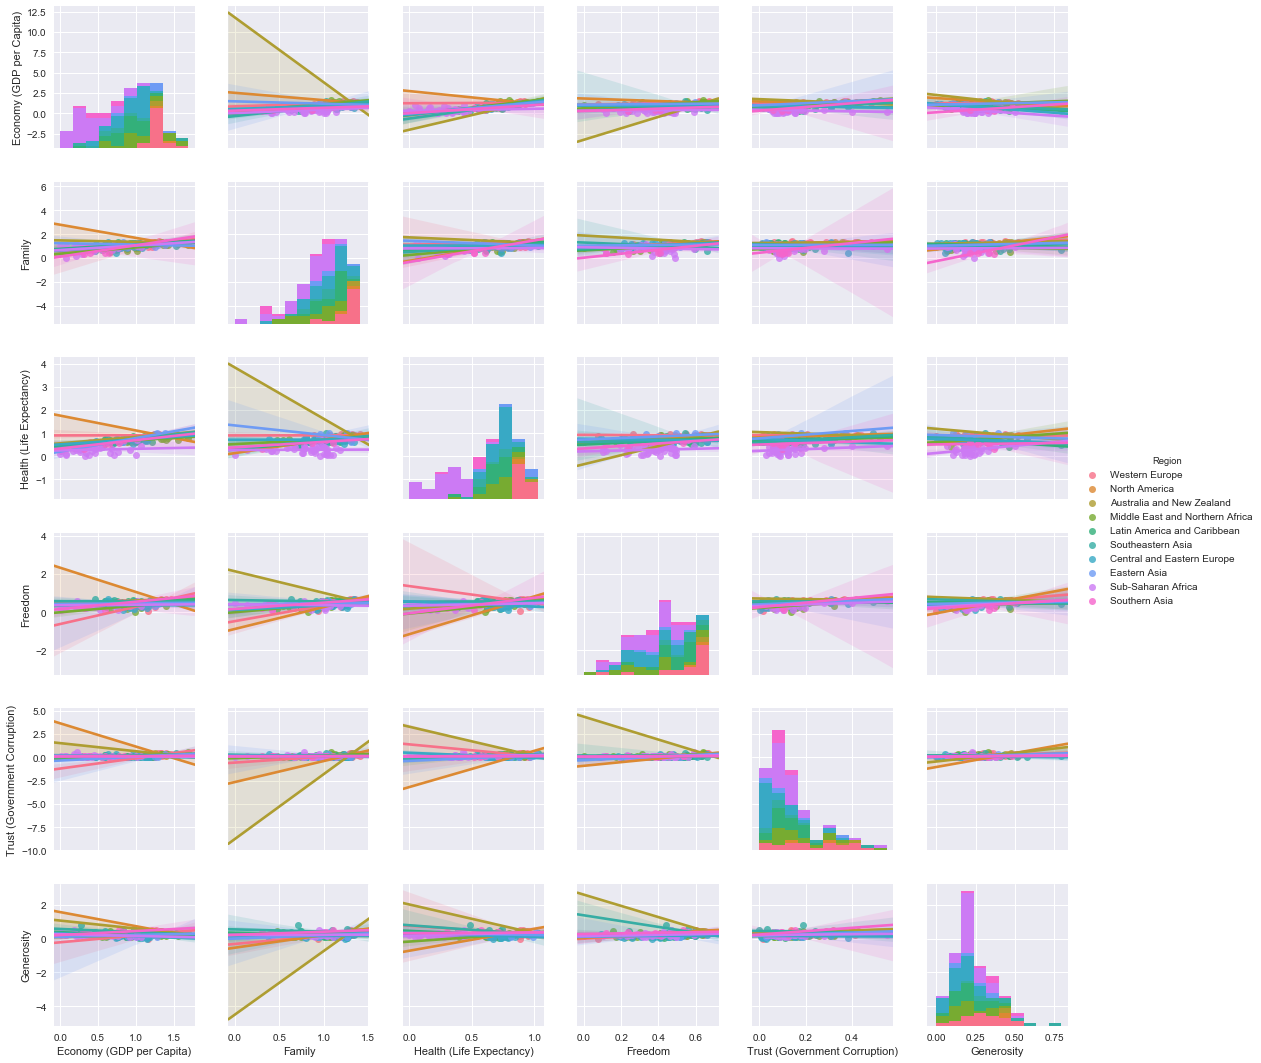

In [15]:
sns.pairplot(visualise, kind='reg', hue="Region")

Quick look on the scatterplots grouped by Region reveal that Australia and New Zealand citizens do not follow the same pattern. There is a negative correlation between Economy and Family. Does it mean that Australia should become poor to have more citizens or maybe Australian people they just don't want to have children any more? We can observe also negative linear relationship between Health and Family. Does it mean that Healthy people don't want to have children? Of course not! This is an example of correlation does not imply causation. 
Similarly North America citizens. Most of variables are negatively correlated with Economy GDP. It seems like even if the country is doing economically well and people are generally happy there they don't want to have a children. What can be underlying problem? 

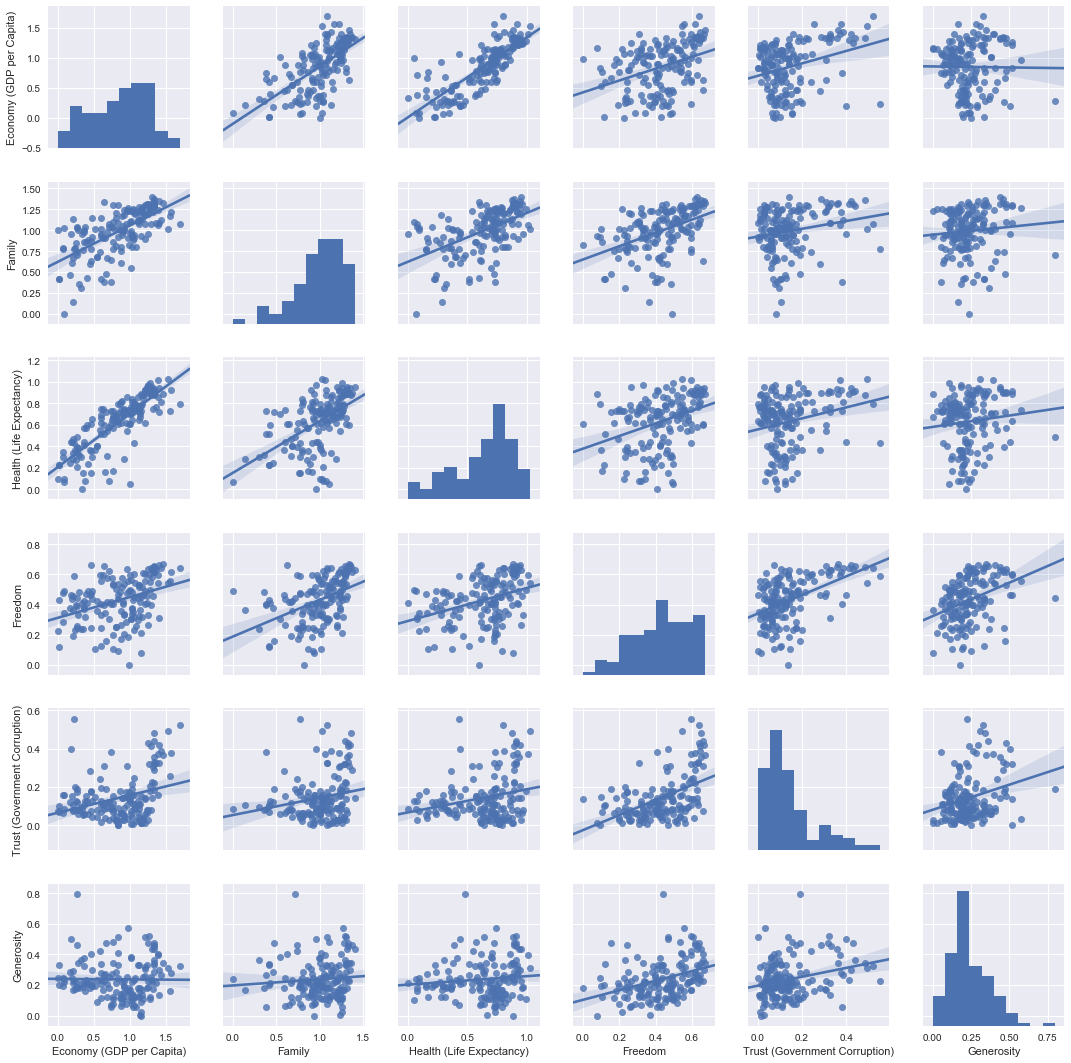

In [16]:
sns.pairplot(visualise, kind='reg')

Quick look on the scatter plot. From this scatterplot we can distinguish two needs for citizens of the world: 
* financial 

Financial needs result in correlation between Economy (GDP per Capita) Family and Health. As we suspected before. Of course, higher GDP means more money for health which results in assurance for parents that they will be able to afford meet needs of their children.
* psychological. 
 
Psychological needs results in correlation between Freedom, Trust and Generosity. If we Trust in good will of government then we we feel free to make independent decisions. Securing psychological needs results in willingness to share goods with others. 